In [ ]:
# Import Libraries
import numpy as np
from pylab import *
from scipy.integrate import odeint
from scipy.optimize import fsolve

In [ ]:
# Population Activation Function
def F(a,theta,I):
    return 1/(1+np.exp(-a*(I-theta))) - 1/(1+np.exp(a*theta))

## Wilson Cowan Model

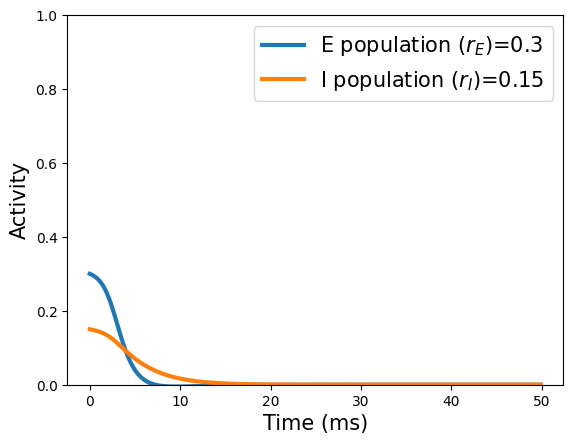

In [ ]:
# Wilson Cowam Model (E-I)
def model(x,t):
    rE, rI = x
    IE = wEE*rE - wEI*rI + Ie
    II = wIE*rE - wII*rI + Ii
    drEdt = 1/taue*(-rE + F(ae,th_e,IE))
    drIdt = 1/taui*(-rI + F(ai,th_i,II))
    return drEdt,drIdt

#Params
ae = 1.2
taue = 1.0
th_e = 2.7
ai = 1.0
th_i = 4
taui = 4.0

#Weights
wEE = 9.
wEI = 4.
wIE = 13.
wII = 11.

Ie = 0.0
Ii = 0.0

dt = 0.1
t = np.arange(0,50,dt)

#Initial values
re_i = 0.3
ri_i = 0.15
ini = [re_i,ri_i]

#Integrate
z = odeint(model,ini,t)

#Plot
plot(t,z,lw=3)
legend([f'E population ($r_E$)={re_i}',f'I population ($r_I$)={ri_i}'],fontsize=15)
ylim([0,1])
xlabel('Time (ms)',fontsize=15)
ylabel('Activity',fontsize=15)
show()

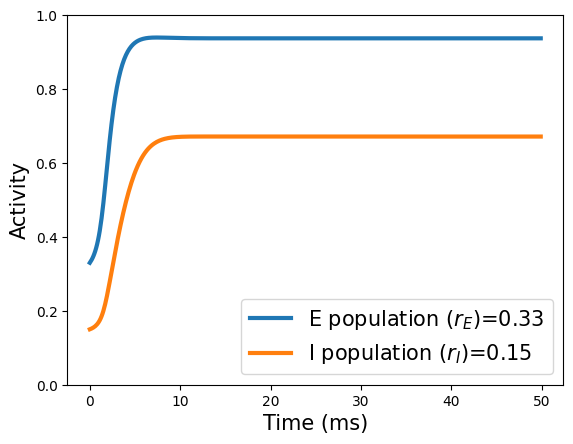

In [ ]:
## Slightly varying initial condition shifts the states
re_i = 0.33
ri_i = 0.15
ini = [re_i,ri_i]
z = odeint(model,ini,t)
plot(t,z,lw=3)

legend([f'E population ($r_E$)={re_i}',f'I population ($r_I$)={ri_i}'],fontsize=15)
ylim([0,1])
xlabel('Time (ms)',fontsize=15)
ylabel('Activity',fontsize=15)
show()

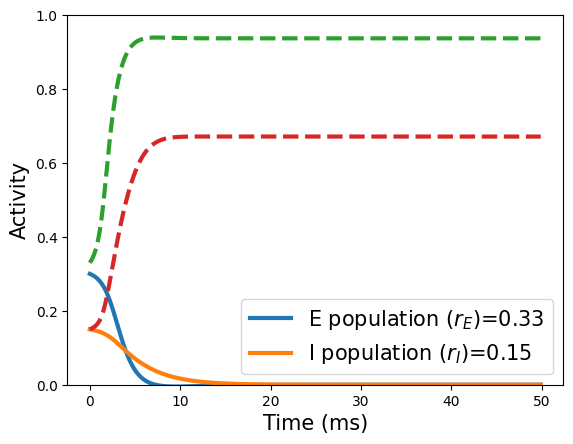

In [ ]:
re_i = 0.3
ri_i = 0.15
ini = [re_i,ri_i]
z = odeint(model,ini,t)
plot(t,z,lw=3)

re_i = 0.33
ri_i = 0.15
ini = [re_i,ri_i]
z = odeint(model,ini,t)
plot(t,z,'--',lw=3)

legend([f'E population ($r_E$)={re_i}',f'I population ($r_I$)={ri_i}'],fontsize=15)
ylim([0,1])
xlabel('Time (ms)',fontsize=15)
ylabel('Activity',fontsize=15)
show()

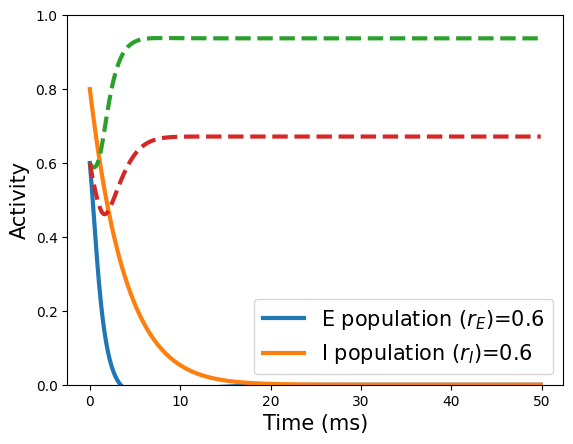

In [ ]:
# Different Initial Conditions
re_i = 0.6
ri_i = 0.8
ini = [re_i,ri_i]
z = odeint(model,ini,t)
plot(t,z,lw=3)

re_i = 0.6
ri_i = 0.6
ini = [re_i,ri_i]
z = odeint(model,ini,t)
plot(t,z,'--',lw=3)

legend([f'E population ($r_E$)={re_i}',f'I population ($r_I$)={ri_i}'],fontsize=15)
ylim([0,1])
xlabel('Time (ms)',fontsize=15)
ylabel('Activity',fontsize=15)
show()

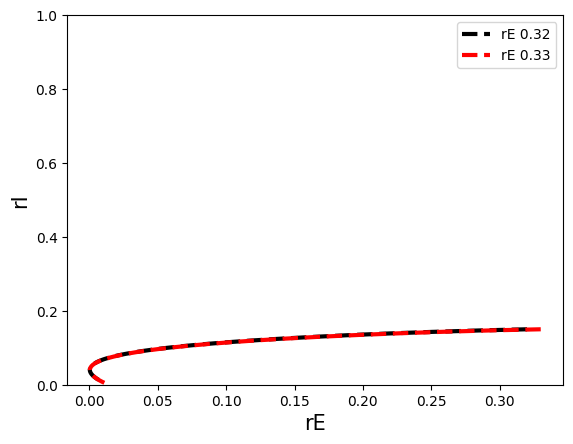

In [ ]:
# Plotting rE-rI plot from two slightly different initial conditions
re_i = 0.32
ri_i = 0.15
ini = [re_i,ri_i]
z = odeint(model,ini,t)
plot(z[:,0],z[:,1],'--k',lw=3,label=f"rE {re_i}")

re_i = 0.33
ri_i = 0.15
ini = [re_i,ri_i]
z = odeint(model,ini,t)
plot(z[:,0],z[:,1],'--r',lw=3,label=f"rE {re_i}")

ylim([0,1])
xlabel('rE',fontsize=15)
ylabel('rI',fontsize=15)
legend()
show()

## Limit Cycle Oscillations
#### wEE=6.4 , wEI=4.8, wIE=6., wII=1.2, and IextE=0.8,

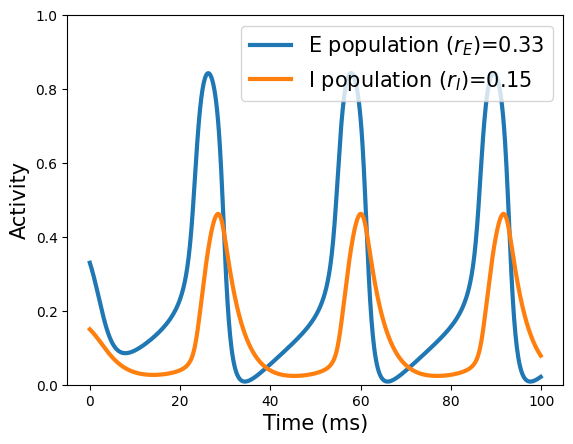

In [ ]:
#Parameters
wEE=6.4; wEI=4.8; wIE=6. ; wII=1.2; Ie=0.8

re_i = 0.33
ri_i = 0.15
ini = [re_i,ri_i]
t = np.arange(0,100,dt)
z = odeint(model,ini,t)
plot(t,z,lw=3)

legend([f'E population ($r_E$)={re_i}',f'I population ($r_I$)={ri_i}'],fontsize=15)
ylim([0,1])
xlabel('Time (ms)',fontsize=15)
ylabel('Activity',fontsize=15)
show()

## FI Curve

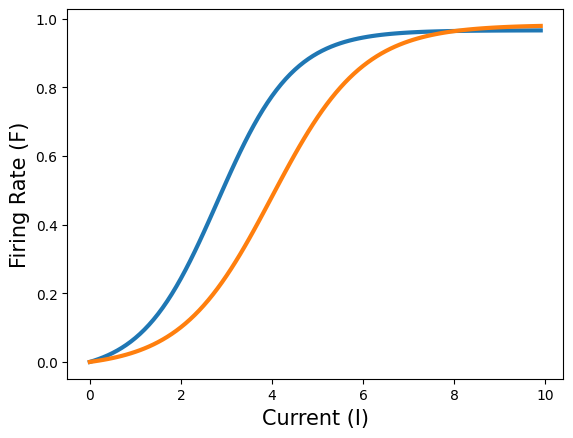

In [ ]:
Ie = np.arange(0,10,0.1)
Ii = np.arange(0,10,0.1)
re_i = 0.0
ri_i = 0.0

fp_E = F(ae,th_e,wEE*re_i - wEI*ri_i + Ie)
fp_I = F(ai,th_i,wIE*re_i - wII*ri_i + Ii)
plot(Ie,fp_E,lw=3)
plot(Ii,fp_I,lw=3)

xlabel("Current (I)",fontsize=15)
ylabel("Firing Rate (F)",fontsize=15)
show()

### F_inv function

In [ ]:
def Finv(x,a,theta):
    return -1/a * np.log((x + (1 + np.exp(a * theta))**-1)**-1 - 1) + theta

## Nullcline

### Still working on this nullclines analysis plot, refer to W2D4 tutorials for clarity.

### Errors in the code.

<ipython-input-5-cf6ddac830b6>:2: RuntimeWarning: invalid value encountered in log
  return -1/a * np.log((x + (1 + np.exp(a * theta))**-1)**-1 - 1) + theta


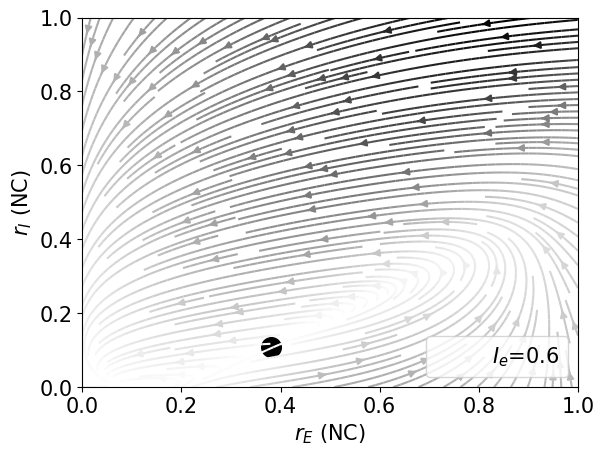

In [ ]:
def wilson_cowan_model(x,t):
    rE, rI = x
    drEdt = 1/taue*(-rE + F(ae,th_e,wEE*rE - wEI*rI + Ie))
    drIdt = 1/taui*(-rI + F(ai,th_i,wIE*rE - wII*rI + Ii))
    return drEdt,drIdt


#Params
ae = 1.2
taue = 1.0
th_e = 2.8
ai = 1.0
th_i = 4.0
taui = 4.0

#Weights for stable states
# wEE = 9.
# wEI = 4.
# wIE = 13.
# wII = 11.

#Weights for oscillatory
wEE = 6.4
wEI = 4.8
wIE = 6.0
wII = 1.2


Ie = 0.6
Ii = 0.0

#re_i = 0.6
#ri_i = 0.8

T = 100
dt = 0.01

t = np.arange(0,T,dt)

def Rss(x):
    return [1/taue*(-x[0] + F(ae,th_e, wEE*x[0] - wEI*x[1] + Ie)), 1/taui*(-x[1] + F(ai,th_i,wIE*x[0] - wII*x[1] + Ii))]

npts = 100
rEmin = 0.0; rEmax = 1.0
rImin = 0.0; rImax = 1.0

rE = np.linspace(rEmin,rEmax,npts)
rI = np.linspace(rImin, rImax, npts)

#Nullclines (Verify the implementation of F_inv, Possibly its incorrect)
rE_nc = 1 / wEI * (wEE * rE - Finv(rE, ae, th_e) + Ie)
rI_nc = 1 / wIE * (wII * rI + Finv(rI, ai, th_i) - Ii)

#plt.plot(rE_nc, rE, label=r'$rE_{NC}$', lw=3)
#plt.plot(rI_nc, rI, label=r'$rI_{NC}$', lw=3)


# Finding fixed points (Stable or Unstable)
#sol1 = fsolve(Rss, [0.1,0.1])
#plt.scatter(sol1[0], sol1[1], s=200,c='k')
#sol2 = fsolve(Rss, [0.5,0.5])
#plt.scatter(sol2[0], sol2[1], s=200,c='r')
sol3 = fsolve(Rss, [0.9,0.9])
plt.scatter(sol3[0], sol3[1], s=200,c='k')

# Meshgrid for different initial conditions
RE, RI = np.meshgrid(rE,rI)
dRE, dRI = wilson_cowan_model([RE, RI], 0.0)
norm = np.sqrt(dRE**2 + dRI**2)

#Ploting streamplot
sp = plt.streamplot(RE, RI, dRE, dRI, color=norm, cmap=plt.cm.binary, density = 2)

xlabel(f'$r_E$ (NC)', size=15)
ylabel(f'$r_I$ (NC)', size=15)
#xlim([-0.1,rEmax])
#ylim([-0.1,rImax])
xticks(size=15)
yticks(size=15)

dx = 0.05

#text(sol1[0]+dx,sol1[1],'Stable',fontsize=15)
#text(sol2[0]+dx,sol2[1],'Unstable',fontsize=15)
#text(sol3[0]-0.1 ,sol3[1]+dx,'Stable',fontsize=15)

plt.scatter(0.5,1.0,s=0,c='g',label=f'$I_e$={Ie}')

legend(loc='lower right' ,fontsize=15)
#savefig('Nullcline_dt_0.01_di_0.01.png', dpi=600)
plt.show()

<ipython-input-18-cf6ddac830b6>:2: RuntimeWarning: invalid value encountered in log
  return -1/a * np.log((x + (1 + np.exp(a * theta))**-1)**-1 - 1) + theta


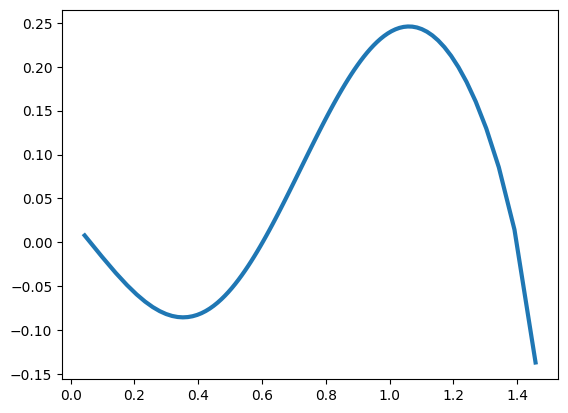

In [ ]:
rE = np.linspace(rEmin,rEmax,npts)
rI = np.linspace(rImin, rImax, npts)

rE_nc = 1 / wEI * (wEE * rE - Finv(rE, ae, th_e) + Ie)
rI_nc = 1 / wIE * (wII * rI + Finv(rI, ai, th_i) - Ii)

#plt.plot(rE_nc, rE, label=r'$rE_{NC}$', lw=3)
plt.plot(rI_nc, rE_nc, label=r'$rI_{NC}$', lw=3)

## Persistent Activity

#### Vary the strength and duration of the stimulus

Initial rE=0.1 Initial rI=0.1 Stimulus Is1=0.67, Is2=3.3 S1_T =10 ms S2_T= 10 ms


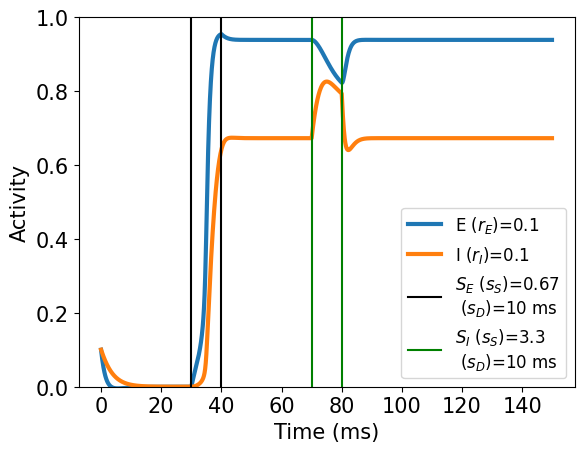

In [ ]:
# Pulse induced persistent activity

def persistent_activity(Is1_strength=0.8, Is1_start_time=20, Is1_stop_time=25, Is2_strength = 0.8, Is2_start_time=120, Is2_stop_time=130):

    # Transient Input
    def wc_model_with_transient_input(x,t,Ie,Ii,Is1,Is2):
        rE, rI = x

        #Input pulse duration
        if(t>t1i and t<t1o):
            Ie = Is1

        elif(t>t2i and t<t2o):
            Ii = Is2

        else:
            Ie = 0.0
            Ii = 0.0

        IE = wEE*rE - wEI*rI + Ie
        II = wIE*rE - wII*rI + Ii
        drEdt = 1/taue*(-rE + F(ae,th_e,IE))
        drIdt = 1/taui*(-rI + F(ai,th_i,II))
        return drEdt,drIdt

    #Parameters
    ae = 1.2
    taue = 1.0
    th_e = 2.8
    ai = 1.0
    th_i = 4.0
    taui = 4.0

    #Weights
    wEE = 9.
    wEI = 4.
    wIE = 13.
    wII = 11.

    Ie = 0.0
    Ii = 0.0

    dt = 0.1
    T = 150
    t = np.arange(0,T,dt)

    #Initial values
    re_i = 0.1
    ri_i = 0.1

    ini = [re_i,ri_i]

    #Pulse/Stimulus
    Is1 = Is1_strength # Pulse/Stimulus Strength
    t1i = Is1_start_time #ms
    t1o = Is1_stop_time #

    Is2 = Is2_strength
    t2i = Is2_start_time
    t2o = Is2_stop_time

    #Integrate
    z = odeint(wc_model_with_transient_input,ini,t,args=(Ie,Ii,Is1,Is2,))

    print(f'Initial rE={re_i}', f'Initial rI={ri_i}',f'Stimulus Is1={Is1}, Is2={Is2} S1_T ={t1o-t1i} ms S2_T= {t2o-t2i} ms')

    #Plot
    plot(t,z[:,0],lw=3, label=f'E ($r_E$)={re_i}')
    plot(t,z[:,1],lw=3, label=f'I ($r_I$)={ri_i}')
    #legend([f'E population ($r_E$)={re_i}',f'I population ($r_I$)={ri_i}'],fontsize=15)

    axvline(t1i,color='k', label=f'$S_E$ ($s_S$)={Is1}\n ($s_D$)={t1o-t1i} ms')
    axvline(t1o,color='k')
    axvline(t2i,color='g', label=f'$S_I$ ($s_S$)={Is2}\n ($s_D$)={t2o-t2i} ms')
    axvline(t2o,color='g')

    #legend([f'E ($r_E$)={re_i}',f'I ($r_I$)={ri_i}',f'S1 ($s_D$)={t1o-t1i} ms',f'S2 ($s_D$)={t2o-t2i} ms'],fontsize=15)
    ylim([0,1])
    legend(loc="lower right",fontsize=12)
    xlabel('Time (ms)',fontsize=15)
    ylabel('Activity',fontsize=15)
    xticks(fontsize=15)
    yticks(fontsize=15)
    show()

# Stimulus 1
stimulus_1_strength = 0.67
stimulus_1_start_time = 30 #ms
stimulus_1_stop_time = 40 #ms

# Stimulus 2
stimulus_2_strength = 3.3
stimulus_2_start_time = 70 #ms
stimulus_2_stop_time = 80 #ms


persistent_activity(stimulus_1_strength, stimulus_1_start_time, stimulus_1_stop_time, stimulus_2_strength, stimulus_2_start_time, stimulus_2_stop_time)
#persistent_activity()

## Equilibrium Condition
### wEE=6.4 , wEI=4.8, wIE=6., wII=1.2, IextE=0.8, τI=0.8, and IextI=0

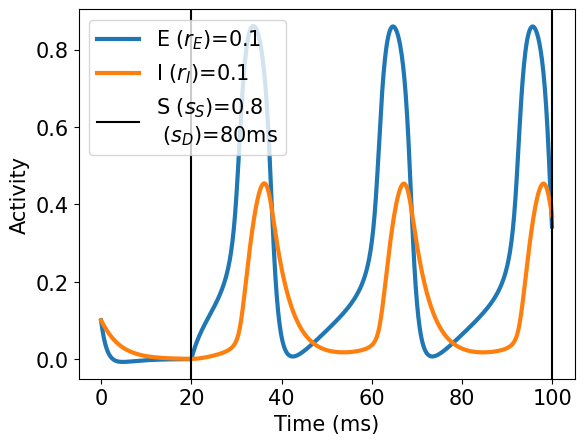

In [ ]:
wEE=6.4 ; wEI=4.8; wIE=6.; wII=1.2; Ie=0.8; tau_i=0.8; Ii=0; Ie = 0.00

def model_with_impulse_for_osc_dynamics(x,t,Ie,pt):
    rE, rI = x

    # Input injected at specific time point (t=50)
    #val = np.sqrt(0.1) + 0.1*(np.random.rand())
    if (t>pt and t<pt+st):
        Ie = 0.7
    else:
        Ie = 0.0

    IE = wEE*rE - wEI*rI + Ie
    II = wIE*rE - wII*rI + Ii
    drEdt = 1/taue*(-rE + F(ae,th_e,IE))
    drIdt = 1/taui*(-rI + F(ai,th_i,II))
    return drEdt,drIdt

re_i = 0.1
ri_i = 0.1
ini = [re_i,ri_i]
pt = 20 # pulse time
st = 80
Ie = 0.8

t = np.arange(0,100,0.1)
z = odeint(model_with_impulse_for_osc_dynamics,ini,t,args=(Ie,pt,))
plot(t,z,lw=3)

plt.axvline(pt,color='black',label = r'$I_e$')
plt.axvline(pt+st,color='black',label = r'$I_e$')
legend([f'E ($r_E$)={re_i}',f'I ($r_I$)={ri_i}',f'S ($s_S$)={Ie}\n ($s_D$)={st}ms'],fontsize=15)
#ylim([0,1])
xlabel('Time (ms)',fontsize=15)
ylabel('Activity',fontsize=15)
xticks(fontsize=15)
yticks(fontsize=15)

show()

### Model with Ramp Input

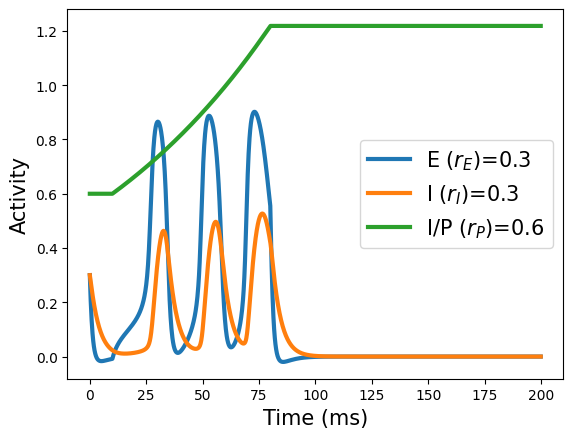

In [ ]:
wEE=6.4 ; wEI=4.8; wIE=6.; wII=1.2; Ie=0.8; tau_i=0.8; Ii=0.0; Ie = 0.00

def model_with_ramp_input(x,t):
    rE, rI,rP = x

    # Providing ramp input between (10-80)
    if (t>10 and t< 80):
        rP += rc
    # To prevent accumulation
    else:
        rP = 0

    IE = wEE*rE - wEI*rI + rP
    II = wIE*rE - wII*rI + Ii

    drEdt = 1/taue*(-rE + F(ae,th_e,IE))
    drIdt = 1/taui*(-rI + F(ai,th_i,II))
    drP = rP*rc

    return drEdt,drIdt,drP

#Initial input value
re_i = 0.3
ri_i = 0.3

# Initial ramp input
rp_i = 0.6

rc = 0.01 # ramp const

ini = [re_i,ri_i, rp_i]

t = np.arange(0,200,0.1)
z = odeint(model_with_ramp_input,ini,t)

plot(t,z,lw=3)
legend([f'E ($r_E$)={re_i}',f'I ($r_I$)={ri_i}', f'I/P ($r_P$)={rp_i}'],loc="center right",fontsize=15)
xlabel('Time (ms)',fontsize=15)
ylabel('Activity',fontsize=15)
show()

### Stochastic Version of the Model

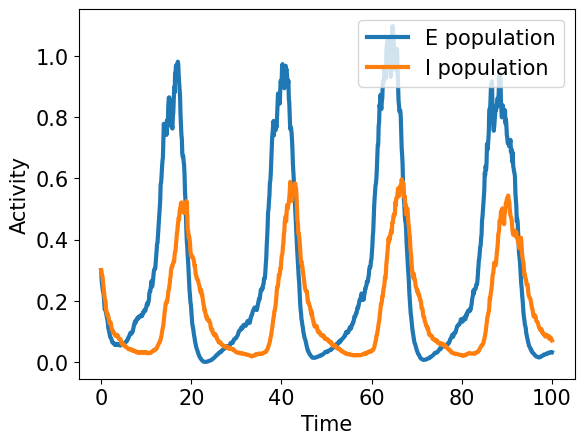

In [ ]:
def F(a,theta,I):
    return 1/(1+np.exp(-a*(I-theta))) - 1/(1+np.exp(a*theta))

#Parameters
dt = 0.1
N = 1000 #
T = 100
sig = 0.1 # Sigma

t = np.linspace(0,T,N)

rE = np.zeros([N])
rI = np.zeros([N])
IE = np.zeros([N])
II = np.zeros([N])

#Initial Conditions
rE[0] = re_i
rI[0] = ri_i

#Constant Input
Ie = 0.8
Ii = 0.0

# Adding Noise
sq = np.sqrt(dt)

# Iteration over time with timestep dt
for i in range(N-1):

    IE = wEE*rE[i] - wEI*rI[i] + Ie
    II = wIE*rE[i] - wII*rI[i] + Ii

    #Different noise values to both rE and rI
    N1 = sq*sig*np.random.randn()  #*dt
    N2 = sq*sig*np.random.randn()  #*dt

    rE[i+1] = rE[i] + 1/taue*(-rE[i] + F(ae,th_e,IE))*dt + rE[i]*N1
    rI[i+1] = rI[i] + 1/taui*(-rI[i] + F(ai,th_i,II))*dt + rI[i]*N2


plot(t,rE,lw=3)
plot(t,rI,lw=3)

legend(['E population','I population'], loc='upper right', fontsize=15)
xlabel('Time', fontsize=15)
ylabel('Activity',fontsize=15)
xticks(fontsize=15)
yticks(fontsize=15)

show()


Following the Ideas MemoryPod (Mathematical Description of the Model)

* With stimulus state transitions
* Without stimulus. (Persistent activity) under what parameter regime?

1. Test various different external inputs (non oscillatory and oscillatory)
2. Check different noisy inputs (different strengths, duration, and intervals, injection time)
3. Constant, Intermittent or Noisy input.
4. Understand behavior of the system (Robustness to stimuli early or later.)

## Working Memory Model with 3 components (2E and 1I)

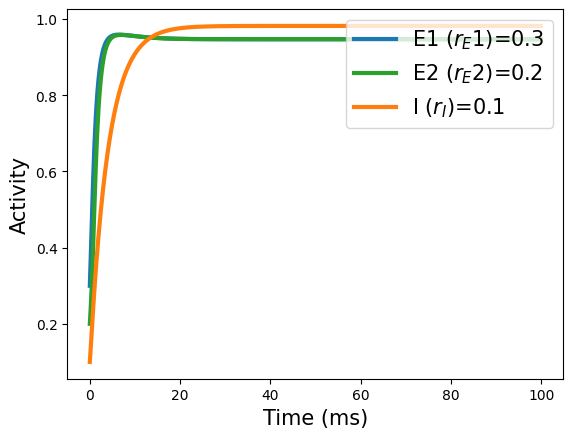

In [ ]:
# Three system of ODEs
def wm_model(x,t):
    rE1, rE2, rI = x
    # Total synaptic input currents
    IE1 = wEE*rE1 + wEE1*rE2 - wEI*rI + Ie
    IE2 = wEE*rE2 + wEE2*rE1 - wEI*rI + Ie
    II =  wIE*rE1 + wIE*rE2 - wII*rI + Ii

    drE1dt = 1/taue*(-rE1 + F(ae,th_e,IE1))
    drE2dt = 1/taue*(-rE2 + F(ae,th_e,IE2))
    drIdt = 1/taui*(-rI + F(ai,th_i,II))
    return drE1dt,drE2dt,drIdt

#Parameters
ae = 1.2
taue = 1.0
th_e = 2.8
ai = 1.0
th_i = 4.0
taui = 4.0

#Default Weights
wEE = 9.
wEI = 4.
wIE = 13.
wII = 11.

#Equilibrium Weights
# wEE = 6.4
# wEI = 4.8
# wIE = 6.0
# wII = 1.2

wEE1 = 0.5 # E2 to E1
wEE2 = 0.5 # E1 to E2

Ie = 1
Ii = 0.0

dt = 0.1
T = 50 #ms
t = np.arange(0,100,dt)

#Initial values
re1_i = 0.3
re2_i = 0.2
ri_i = 0.1

ini = [re1_i,re2_i,ri_i]

#Integrate
z = odeint(wm_model,ini,t)

#Plot
plot(t,z[:,0],'C0',lw=3,label=f'E1 ($r_E1$)={re1_i}')
plot(t,z[:,1],'C2',lw=3,label=f'E2 ($r_E2$)={re2_i}')
plot(t,z[:,2],'C1',lw=3,label=f'I ($r_I$)={ri_i}')
legend(loc="upper right",fontsize=15)
xlabel('Time (ms)',fontsize=15)
ylabel('Activity',fontsize=15)
#ylim([0,1])
show()

### Different States with equilibrium weights (Oscillatory Behavior)

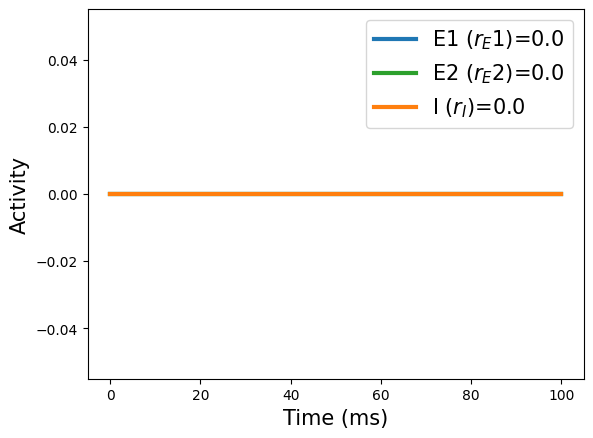

In [ ]:
#Weights
wEE = 6.4
wEI = 4.8
wIE = 6.0
wII = 1.2

wEE1 = 4.5 # E2 to E1
wEE2 = 1.5 # E1 to E2

Ie = 0.0
Ii = 0.0

dt = 0.1
T = 50 #ms
t = np.arange(0,100,dt)

#Initial values
re1_i = 0.0
re2_i = 0.0
ri_i = 0.0

ini = [re1_i,re2_i,ri_i]

#Integrate
z = odeint(wm_model,ini,t)

#Plot
plot(t,z[:,0],'C0',lw=3,label=f'E1 ($r_E1$)={re1_i}')
plot(t,z[:,1],'C2',lw=3,label=f'E2 ($r_E2$)={re2_i}')
plot(t,z[:,2],'C1',lw=3,label=f'I ($r_I$)={ri_i}')
legend(loc="upper right",fontsize=15)
xlabel('Time (ms)',fontsize=15)
ylabel('Activity',fontsize=15)
#ylim([0,1])
show()

### Testing different initial conditions.

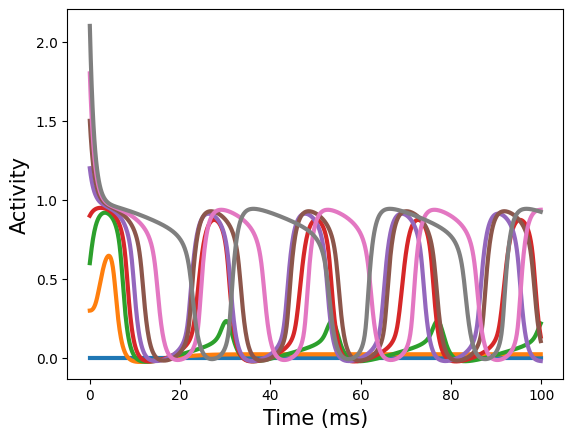

In [ ]:
#Default Weights
# wEE = 9.
# wEI = 4.
# wIE = 13.
# wII = 11.

#Equilibrium Weights
wEE = 6.4
wEI = 4.8
wIE = 6.0
wII = 1.2

for ri in arange(0,2.4,0.3):

    re2_i = ri
    Ie = ri
    ini = [re1_i,re2_i,ri_i]
    z = odeint(wm_model,ini,t)
    #Plot
    #plot(t,z[:,0],lw=3,label=f'E1 ($r_E1$)={re1_i}')
    plot(t,z[:,1],lw=3,label=f'E1 ($r_E1$)={re1_i}')
    #plot(t,z[:,2],lw=3,label=f'E1 ($r_E1$)={re1_i}')

#legend(loc="upper right",fontsize=15)
xlabel('Time (ms)',fontsize=15)
ylabel('Activity',fontsize=15)
#ylim([0,1])
show()

Null cline analysis will be done using XPPAUT for 3D system to visualize its plots. (Particularly visualiing bifurcation plots)
Will share the .ode code or dynamcs or possible share screen.